# 미니프로젝트 : 가위바위보 분류기 만들기 

## 데이터를 준비하기 

### 가위 / 바위 / 보 이미지 데이터 만들기 

- 구글의 teachable machine 사이트에서 쉽게 데이터를 만들어볼 수 있습니다.

- 아래 사이트에서 Get Started 버튼을 눌러보세요.

- 그 다음, Image Project를 선택하면 Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 멋진 화면이 나타납니다.

- [goggle teachable machine 링크](https://teachablemachine.withgoogle.com/)


### 데이터 불러오기 + Resize 하기 

- 구글로 만들어진 이미지의 사이즈가 224x224 이다. 
- 그래서 28x28 사이즈로 Resize 해줘야 합니다. 



In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# !pip install pillow   

from PIL import Image
import os, glob
import numpy as np

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 가위 Resize 

In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Project/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/Project/rock_scissor_paper/scissor
가위 이미지 resize 완료!


### 바위 Resize 

In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Project/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/Project/rock_scissor_paper/rock
바위 이미지 resize 완료!


### 보 Resize 

In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Project/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel0042/Project/rock_scissor_paper/paper
보 이미지 resize 완료!


### 데이터 불러들어오기 load_data()

In [7]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=7500   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Project/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

# x_train 최소값 0 , 최대값 255 그래서 정규화를 /255.0 으로 해주어 최소값 최대값을 0-1 사이의 값으로 바꿈
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

학습데이터(x_train)의 이미지 개수는 7500 입니다.
x_train shape: (7500, 28, 28, 3)
y_train shape: (7500,)
최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


### 이미지 불러오기 

라벨:  0


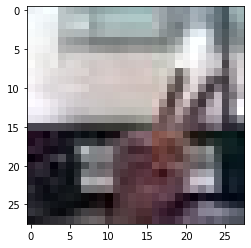

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])
print('라벨: ', y_train[3])

### 딥러닝 네트워크 설계하기 

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

### 딥러닝 네트워크 학습시키기 

In [10]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=60)

Epoch 1/60
235/235 [==============================] - 1s 2ms/step - loss: 1.0058 - accuracy: 0.5016
Epoch 2/60
235/235 [==============================] - 1s 2ms/step - loss: 0.7363 - accuracy: 0.7047
Epoch 3/60
235/235 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.7852
Epoch 4/60
235/235 [==============================] - 1s 2ms/step - loss: 0.4451 - accuracy: 0.8381
Epoch 5/60
235/235 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8837
Epoch 6/60
235/235 [==============================] - 1s 2ms/step - loss: 0.2871 - accuracy: 0.9057
Epoch 7/60
235/235 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9244
Epoch 8/60
235/235 [==============================] - 1s 2ms/step - loss: 0.1936 - accuracy: 0.9392
Epoch 9/60
235/235 [==============================] - 1s 2ms/step - loss: 0.1644 - accuracy: 0.9497
Epoch 10/60
235/235 [==============================] - 1s 2ms/step - loss: 0.1377 - accuracy: 0.9589

### 테스트 하기 

In [12]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Project/test_rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/217.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
x_test_norm shape: (600, 28, 28, 3)
y_test shape: (600,)


### 테스트 데이터로 성능 확인

- 학습용 데이터 x_train 을 가지고 구한 정확도 와 y_test 데이터와의 차이

In [13]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 0.7816 - accuracy: 0.9083
test_loss: 0.7815627455711365 
test_accuracy: 0.9083333611488342


### 분석 목표 및 고찰 

1. MNIST 같이 학습용으로 잘 정제된 데이터셋과 달리 직접 만들어 쓰는 이미지 데이터 셋에 접근하는 방법 
2. 흑백과 컬러 이미지의 네트워크 모델링 차이  
3. 데이터량의 증가로 개선되는 정확도 

---

- 총 3백장의 가위, 바위, 보 train 데이터셋으로 학습시 정확도는 100에 가까웠다. 
- 300장의 test데이터 셋으로 학습정확도를 정검한 결과 31% 정확도를 보였다. 
- 우선 살펴본 test 데이터 셋과 train 데이터 셋의 이미지 상태는 찍힌 배경과 상황에 따라 시각적으로 판단하기에도 매우 달랐고 특히 배경에 여러 물체가 같이 찍힌 이미지는 분류과정에서 오류나는 경우가 많았다. 
- 정확도를 개선하기 위해 좀 더 다양한 시점과 배경, 다른 상황에서 찍힌 가위, 바위, 보 데이터 셋을 총 7500장을 모았고 이를 분류한 결과는 90% 넘는 정확도를 보였다. 
- 단지 데이터셋을 늘렸을 뿐인데 이렇게 다른 결과를 보인 점이 흥미로웠고 데이터셋의 중요도를 인지할 수 있었다. 

